# Demo of calculating dN/dH with Kernel Density Estimation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from statsmodels.nonparametric.kde import KDEUnivariate

In [3]:
#DEFINE DIFFERENTIAL SIZE-FREQUENCY DISTRIBUTION (ACTUALLY Hmag-FREQUENCY)
def dNbydHfromList(Hdata,Hgrid,**kwargs):
    """Calculate dN/dH from list of H values on grid
    Parameters:
    -----------
    Hdata  ... (array, float) list of Hmags of object population 
    Hgrid  ... (array, float) Hmag gird to evaluate dN/dH on
    
    Returns:
    --------
    dNbydH ... (array, float) dN/dH on Hgrid
    """
    dNbydH=kde_statsmodels_u(Hdata, Hgrid, bandwidth=0.2, **kwargs)*len(Hdata)
    return dNbydH

In [4]:
# CONVENIENCE WRAPPER AROUND KDEUNIVARIATE

def kde_statsmodels_u(y, x_grid, bandwidth=0.2):
    """Univariate Kernel Density Estimation of array y on gridpoints x_grid
    
    Parameters:
    -----------
    y        ... (array, float) datapoints for KDE 
    x_grid   ... (array, float) grid points on which KDE is evaluated
    
    Returns:
    --------
    kde.evaluate(x_grid) ... (array, float) KDE evaluated at x_grid gridpoints
    
    """
    kde = KDEUnivariate(y)
    kde.fit(bw=bandwidth)
    return kde.evaluate(x_grid)

Load and clean TNO data file.

In [5]:
dfTNO=pd.read_csv('data/TNO_2021_06_12.tar.gz')
dfTNO.drop(['G'],axis=1,inplace=True)
HTNO=dfTNO['H'].dropna()

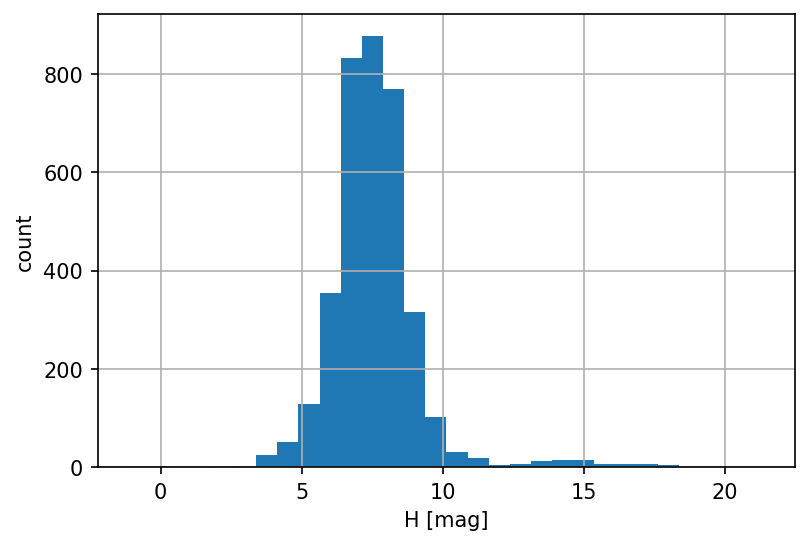

In [6]:
plt.figure(dpi=150)
HTNO.hist(bins=30)
plt.xlabel('H [mag]')
plt.ylabel('count')
plt.show()

Calculate real dN/dH.

In [10]:
Hrange=np.arange(4,20,0.5)

In [11]:
dndh=dNbydHfromList(HTNO,Hrange)

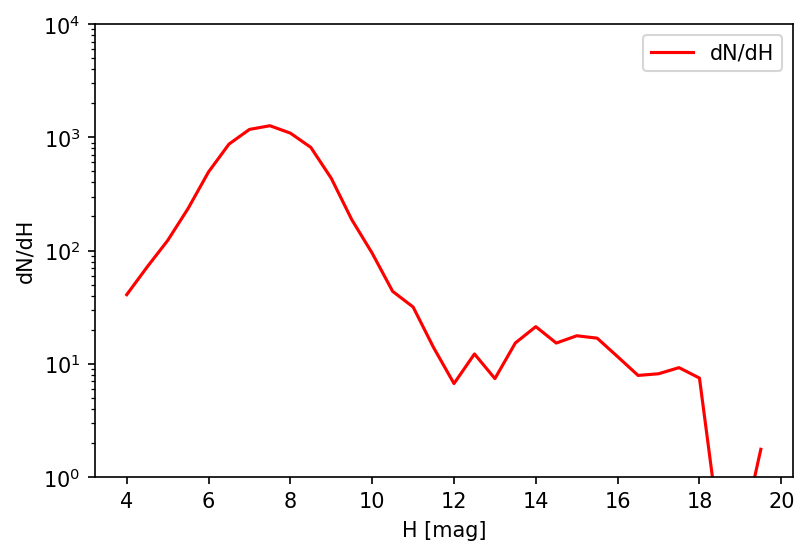

In [16]:
plt.figure(dpi=150)
plt.plot(Hrange,dndh,'r-',label="dN/dH" )
plt.yscale('log')
plt.ylim(1e-0,10000)
plt.legend()
plt.ylabel('dN/dH')
plt.xlabel('H [mag]')
plt.show()